In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cyberbullying_tweets.csv")
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [ ]:
!pip install demoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 1.3 MB/s eta 0:00:00


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import demoji
import string

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm',
                  'im', 'll', 'y', 've', 'u', 'ur', 'don',
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat',
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')
def clean_text(text):

    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    # Make all text lowercase
    text = text.lower()

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])

    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [ ]:
df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))  # Applying the cleaning to the text data

In [ ]:
df.head()

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,whi white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,gio meh thank head concern anoth angri dude tw...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account islam lies


In [ ]:
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
cleaned_text          0
dtype: int64

In [ ]:
df['cleaned_text'].duplicated().sum() # Checking for duplicate values

2887

In [ ]:
df.drop_duplicates("cleaned_text", inplace = True)

In [ ]:
df['cleaned_text'].str.isspace().sum()     # Checking for tweets with only whitespaces

0

In [ ]:
df = df[df["cyberbullying_type"]!="other_cyberbullying"]

In [ ]:
df['cyberbullying_type'].value_counts()

religion             7946
age                  7887
ethnicity            7797
not_cyberbullying    7670
gender               7637
Name: cyberbullying_type, dtype: int64

<Axes: xlabel='cyberbullying_type', ylabel='count'>

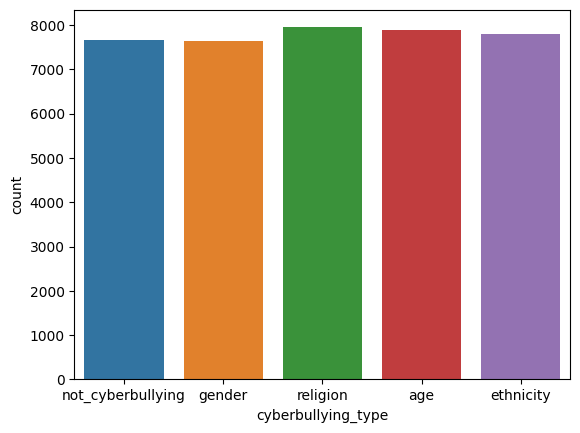

In [ ]:
sns.countplot(data = df, x = 'cyberbullying_type')

In [ ]:
# Plotting the top 15 words of each cyberbullying type
for cyber_type in df.cyberbullying_type.unique():

    top50_word = df.cleaned_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:15]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(marker_color='red')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
X = df['cleaned_text']  # Feature (raw data)
y = df['cyberbullying_type']  # Target Label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
tfidf = TfidfVectorizer(max_features = 5000)  # Using the TF - IDF Vectorizer to extract top 5000 most important features
# from the text data

In [ ]:
# Feature Extraction
X_train_tfidf = tfidf.fit_transform(X_train)  # Creating the vocabulary only from the training set to avoid data leakage from
X_test_tfidf = tfidf.transform(X_test)        # the test set.

In [ ]:
X_train_tfidf  # Sparse Matrix is created to save memory since many values are close to 0

<35043x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 403374 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tfidf   # Sparse Matrix

<3894x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 44224 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()   # Converting the sparse matrix to a numpy array (dense matrix)
tfidf_array_test = X_test_tfidf.toarray()     # Converting the sparse matrix to a numpy array (dense matrix)
scaled_X_train = scaler.fit_transform(tfidf_array_train)  # Fitting on only training data to avoid data leakage from test data
scaled_X_test = scaler.transform(tfidf_array_test) # and then tranforming both training and testing data

In [ ]:
# Performing Dimensionality Reduction using Principal Component Analysis
from sklearn.decomposition import PCA
NUM_COMPONENTS = 5000  # Total number of features
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit(scaled_X_train)

In [ ]:
variance_explained = np.cumsum(pca.explained_variance_ratio_)  # Calculating the cumulative explained variance by the components

Text(0, 0.5, 'Cumulative explained variance')

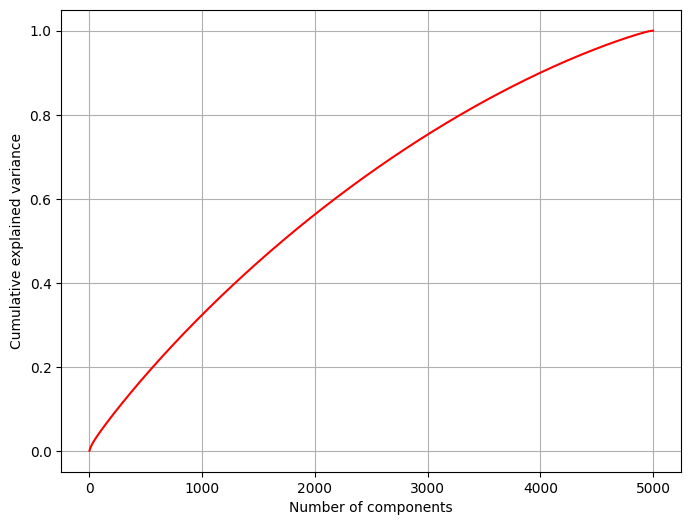

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
final_pca = PCA(0.9)
reduced_90 = final_pca.fit_transform(scaled_X_train) # Number of Components explaining 90% variance in the training data

In [ ]:
reduced_90_test = final_pca.transform(scaled_X_test)

In [ ]:
reduced_90.shape

(35043, 3999)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
# LOGISTIC REGRESSION with the complete data
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
log_model = LogisticRegression(solver = 'saga')
param_grid = {'C': np.logspace(0, 10, 5)}
grid_log_model = HalvingGridSearchCV(log_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_log_model.fit(X_train_tfidf, y_train)
preds_grid_log_model = grid_log_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_log_model))
# plot_confusion_matrix(grid_log_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.96      0.97      0.96       766
        ethnicity       0.98      0.98      0.98       801
           gender       0.92      0.84      0.88       788
not_cyberbullying       0.80      0.85      0.82       783
         religion       0.94      0.96      0.95       756

         accuracy                           0.92      3894
        macro avg       0.92      0.92      0.92      3894
     weighted avg       0.92      0.92      0.92      3894



In [ ]:
grid_log_model.best_estimator_ # C = 1

LogisticRegression(solver='saga')

In [ ]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_svm_model))
# plot_confusion_matrix(grid_svm_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.94      0.98      0.96       766
        ethnicity       0.97      0.98      0.98       801
           gender       0.94      0.81      0.87       788
not_cyberbullying       0.79      0.85      0.82       783
         religion       0.95      0.96      0.96       756

         accuracy                           0.92      3894
        macro avg       0.92      0.92      0.92      3894
     weighted avg       0.92      0.92      0.92      3894



In [ ]:
grid_svm_model.best_estimator_

LinearSVC(C=0.1)

In [ ]:
# NEURAL NETWORKS
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(X_train_tfidf, y_train)
preds_grid_nn_model = grid_nn_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_grid_nn_model))
# plot_confusion_matrix(grid_nn_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.96      0.95      0.96       766
        ethnicity       0.97      0.98      0.97       801
           gender       0.88      0.85      0.87       788
not_cyberbullying       0.80      0.83      0.81       783
         religion       0.95      0.95      0.95       756

         accuracy                           0.91      3894
        macro avg       0.91      0.91      0.91      3894
     weighted avg       0.91      0.91      0.91      3894



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.



In [ ]:
grid_nn_model.best_estimator_

MLPClassifier(activation='logistic', learning_rate_init=0.002, max_iter=10)

In [ ]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
preds_nb_model = nb_model.predict(X_test_tfidf)
print(classification_report(y_test, preds_nb_model))
# plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

                   precision    recall  f1-score   support

              age       0.81      0.97      0.88       766
        ethnicity       0.88      0.91      0.90       801
           gender       0.86      0.80      0.83       788
not_cyberbullying       0.83      0.55      0.66       783
         religion       0.81      0.96      0.88       756

         accuracy                           0.84      3894
        macro avg       0.84      0.84      0.83      3894
     weighted avg       0.84      0.84      0.83      3894



In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Creating a pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000)), ('rf_model', RandomForestClassifier(n_estimators = 128, random_state = 42))])
pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('rf_model',
                 RandomForestClassifier(n_estimators=128, random_state=42))])

In [ ]:
pipe.predict(["@abc Hey man! Great match today. Your smashes were spot on. Let's continue playing together. \
               #badminton #brotherhood #men #doubles"])

array(['not_cyberbullying'], dtype=object)

In [ ]:
pipe.predict(["Going to Africa. Hope I don't get AIDS. Just kidding. I'm white!"])

array(['ethnicity'], dtype=object)

In [ ]:
pipe.predict(["Muslims should be punished. We are not doing enough to rid us of those filthy animals."])

array(['religion'], dtype=object)

In [ ]:
pipe.predict(["@abc Man you don't have any facial hair. You look like a fucking 9 year old school boy! #clown #idiot"])

array(['age'], dtype=object)

In [ ]:
pipe.predict(["@abc shut up gay boy"])

array(['gender'], dtype=object)